<a href="https://colab.research.google.com/github/Al-Ahdal/Deep-learning-ML-and-tensorflow/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
import io
import pandas as pd
data = pd.read_csv('/content/heart (1).csv')


In [418]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from mlxtend.classifier import StackingCVClassifier

In [419]:
#print first 5 rows of the data
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [420]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [421]:
#data types 
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [422]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [423]:
# ProfileReport generate a basic report on the input DataFrame
report = ProfileReport(train)

print(repr(report.report))

report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [424]:
data.shape

(303, 14)

In [425]:
# Checking for missing values.
data.isnull().values.any()

False

In [426]:
#I selected all of the numerical columns, took their average, and grouped them by our target column, "target".
data.groupby("target")[["thalach","chol","age","trestbps"]].mean()

thalach        chol        age    trestbps
target                                               
0       139.101449  251.086957  56.601449  134.398551
1       158.466667  242.230303  52.496970  129.303030



* A somewhat significant difference is apparent between the maximum heart rates of people who are sick and healthy, since healthy people were able to reach a 20 beats per minute higher maximum heart rate on average compared to those who are ill
*   Those who weren't sick had a lower resting heart rate compared to ill people, however this difference is not that significant (especially compared to the difference between the patients' maximal heart rate) and differs merely by 6 beats per minute on average.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


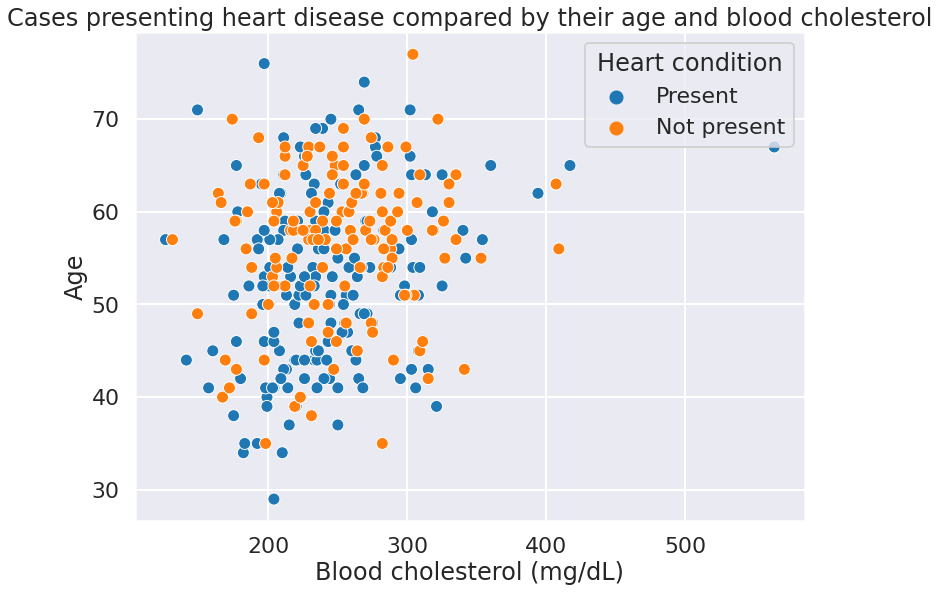

In [427]:
#I had to create a new column since Seaborn gave me some trouble with proper legend labeling, it's not essential
data["Heart condition"] = data["target"].replace({1:"Present", 0:"Not present"})
#Part concerning the actual plotting
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("chol", "age", hue=data["Heart condition"], data=data)
plt.title("Cases presenting heart disease compared by their age and blood cholesterol")
plt.xlabel("Blood cholesterol (mg/dL)")
plt.ylabel("Age")
plt.show()

There's a slight skewing (or clustering) towards the right side of the plot for healthy individuals, meaning individuals that were able to achieve higher maximum heart rates might be more likely to have a healthy heart. It should also be noted that younger individuals could reach higher heart beats per minute, meaning there's an inverse relationship between age and maximum heart rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


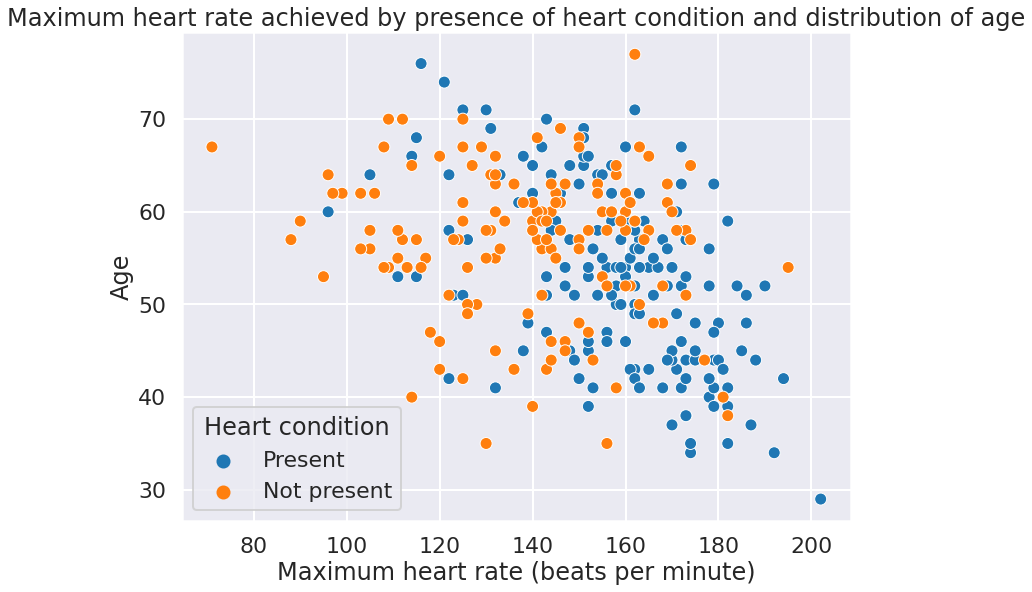

In [428]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("thalach", "age", hue=data["Heart condition"], data=data)
plt.title("Maximum heart rate achieved by presence of heart condition and distribution of age")
plt.xlabel("Maximum heart rate (beats per minute)")
plt.ylabel("Age")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


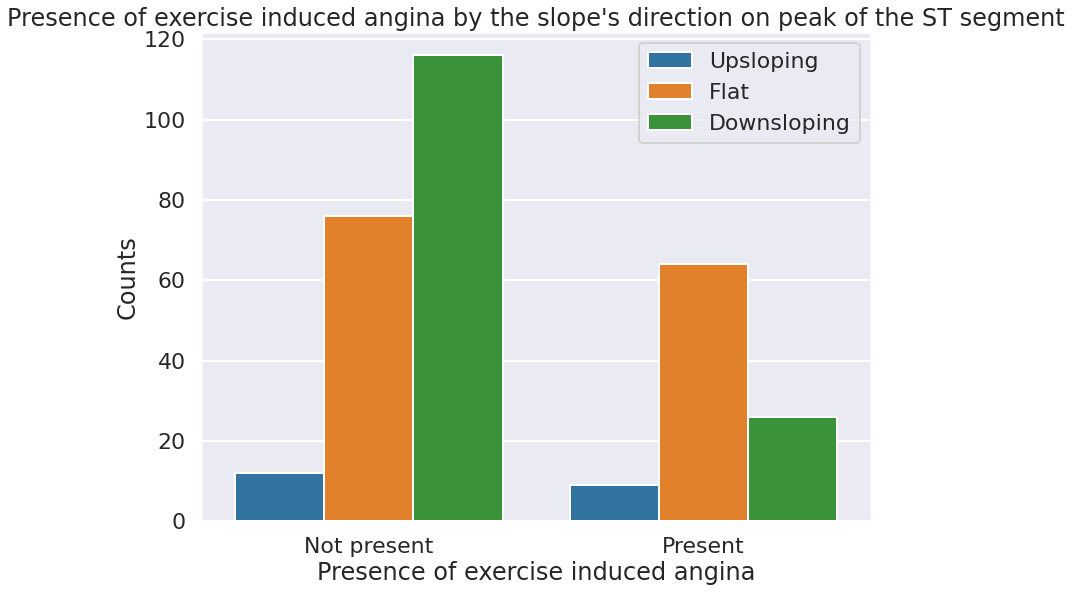

In [429]:
plt.figure(figsize=(12, 9))
g = sns.countplot("exang", hue="slope", data=data)
g.set_xticklabels(["Not present", "Present"])
plt.title("Presence of exercise induced angina by the slope's direction on peak of the ST segment")
plt.xlabel("Presence of exercise induced angina")
plt.ylabel("Counts")
plt.legend(["Upsloping", "Flat", "Downsloping"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


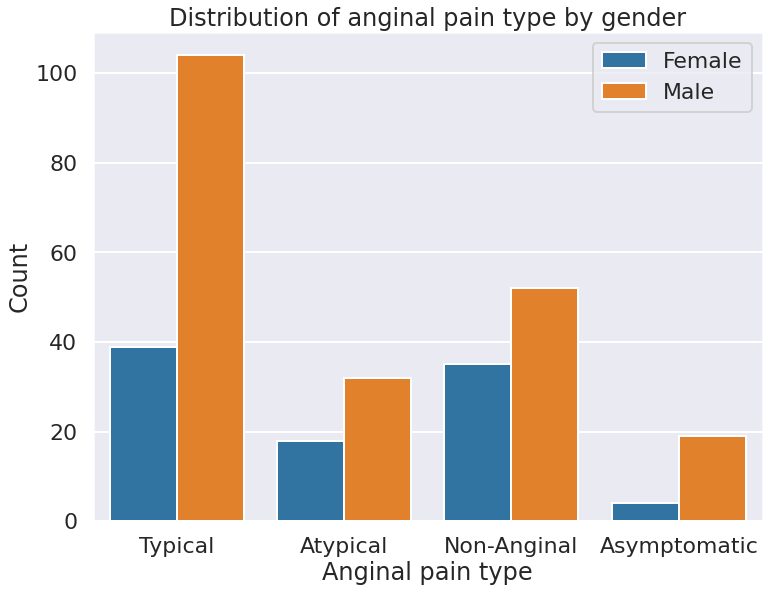

In [440]:
plt.figure(figsize=(12, 9))
g = sns.countplot("cp", hue="sex", data=data)
g.set_xticklabels(["Typical", "Atypical", "Non-Anginal", "Asymptomatic"])
plt.title("Distribution of anginal pain type by gender")
plt.xlabel("Anginal pain type")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.show()

In [441]:
#Binning continous features together and therefore creating discrete categorical columns could 
#help the model to generalize the data and reduce overfitting
data=df
df["thalach"] = pd.cut(df["thalach"], 8, labels=range(1, 9))
df["trestbps"] = pd.cut(df["trestbps"], 5, labels=range(8, 13))
df["age"] = pd.cut(df["age"], 12, labels=range(12, 24))
df["chol"] = pd.cut(df["chol"], 10, labels=range(24, 34))
df["oldpeak"] = pd.cut(df["oldpeak"], 5, labels=range(34, 39))

I converted all the continous values into categorical ones by binning them. The model is able to interprete the distributed weights of a particular feature when "there are less options to choose from" regarding observations

 **One-hot encoding categorical values**

In [442]:
a = pd.get_dummies(data, columns=["cp", "restecg", "slope", "thalach", "trestbps", "age", "chol", "thal", "oldpeak"], 
                   prefix=["cp", "restecg", "slope", "thalach", "trestbps", "age", "chol", "thal", "oldpeak"], drop_first=True)

It's important to encode the categorical features since the model will otherwise treat the numbers that represent categories as weights instead, this could create the risk of the model capturing non-existent relationships between the features. I used one hot encoding with pandas by setting the drop_first argument to True.

In [443]:
a = a.drop("Heart condition", axis=1)

I also dropped the renamed condition column that I used for proper legend labeling above on the graphs

In [444]:
a.head()

sex  fbs  exang  ca  target  cp_1  cp_2  cp_3  restecg_1  restecg_2  ...  \
0    1    1      0   0       1     0     0     1          0          0  ...   
1    1    0      0   0       1     0     1     0          1          0  ...   
2    0    0      0   0       1     1     0     0          0          0  ...   
3    1    0      0   0       1     1     0     0          1          0  ...   
4    0    0      1   0       1     0     0     0          1          0  ...   

   chol_31  chol_32  chol_33  thal_1  thal_2  thal_3  oldpeak_35  oldpeak_36  \
0        0        0        0       1       0       0           1           0   
1        0        0        0       0       1       0           0           1   
2        0        0        0       0       1       0           1           0   
3        0        0        0       0       1       0           0           0   
4        0        0        0       0       1       0           0           0   

   oldpeak_37  oldpeak_38  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  

[5 rows x 50 columns]



 **Determining feature importances**



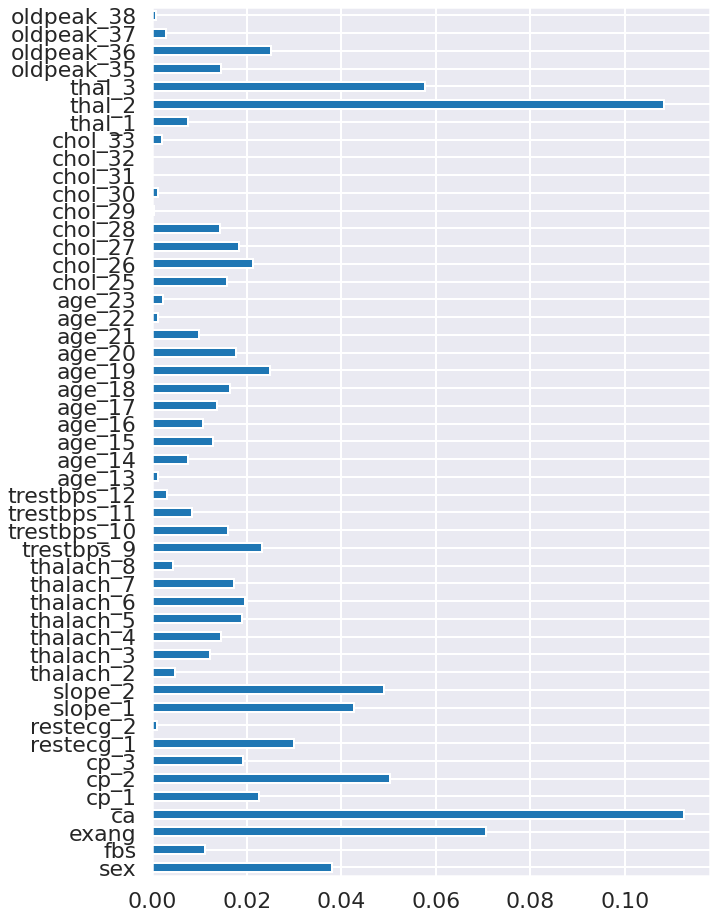

In [445]:
rf = RandomForestClassifier()
rf.fit(a.drop("target", axis=1), a.target)
importances = rf.feature_importances_
features = pd.Series(importances, index=a.drop("target", axis=1).columns)
plt.figure(figsize=(10, 16))
features.plot(kind="barh")
plt.show()

I used a Random Forest Classifier in order to determine feature importances and plotted them.

**Building the model and hyperparameter tuning**

In [480]:
X = a.drop(["target","restecg_2", "thalach_2", "thalach_8", "trestbps_12", "age_13", "age_22", "age_23", 
            "chol_29", "chol_30", "chol_31", "chol_32", "chol_33", "oldpeak_37", "oldpeak_38"], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)



Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [451]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 110, 1: 132})

In [452]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine

In [464]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[22  6]
 [ 2 31]]


Accuracy of Logistic Regression: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [466]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[22  6]
 [ 4 29]]


Accuracy of Naive Bayes model: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [455]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[28  0]
 [ 2 31]]


Accuracy of Random Forest: 96.72131147540983 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [456]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[25  3]
 [ 0 33]]


Accuracy of Extreme Gradient Boost: 95.08196721311475 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.92      1.00      0.96        33

    accuracy                           0.95        61
   macro avg       0.96      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [457]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[23  5]
 [ 1 32]]


Accuracy of K-NeighborsClassifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [467]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[22  6]
 [ 8 25]]


Accuracy of DecisionTreeClassifier: 77.04918032786885 

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [459]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[28  0]
 [ 0 33]]


Accuracy of Support Vector Classifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



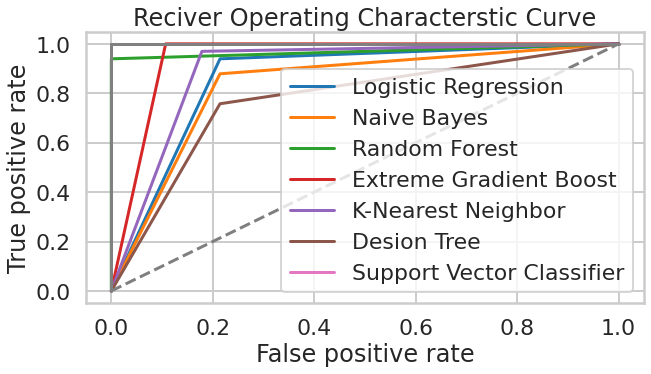

In [468]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')


plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


**Model Evaluation**

In [469]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model    Accuracy
0     Logistic Regression   86.885246
1             Naive Bayes   83.606557
2           Random Forest   96.721311
3  Extreme Gradient Boost   95.081967
4     K-Nearest Neighbour   90.163934
5           Decision Tree   77.049180
6  Support Vector Machine  100.000000

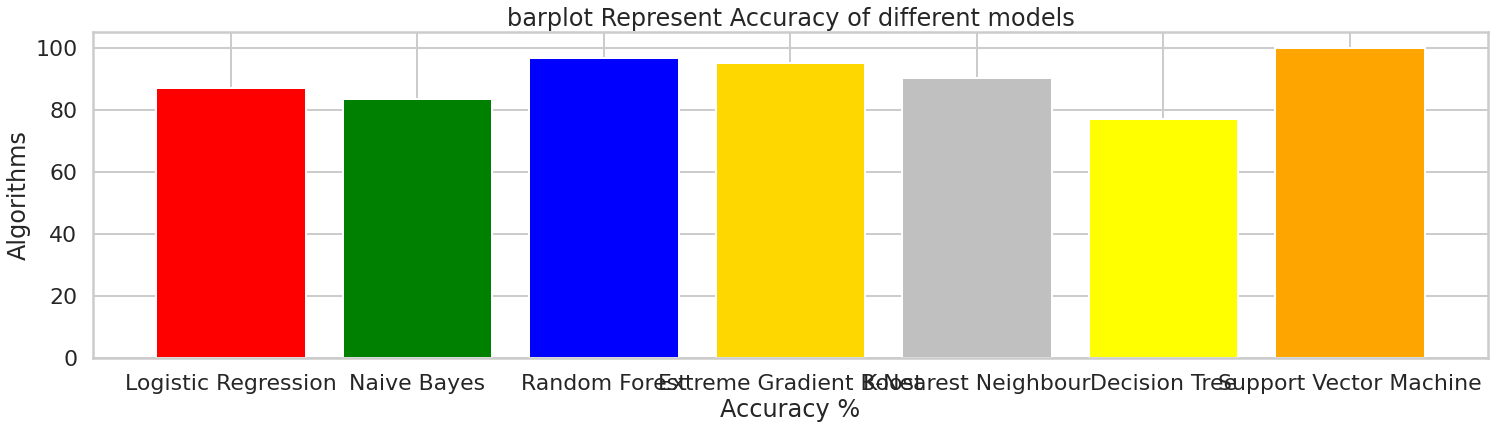

In [470]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(25,6))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [476]:
xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", max_depth=1,
                    n_estimators=500,learning_rate=0.05,colsample_bytree=0.20,subsample=0.5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

I dropped the target ("condition") column and all the feature columns that had a relatively lower importance percentage (such as the columns "chol_31" and "chol_32 which weren't been used at all by the model to split nodes) in order to reduce noise and overfitting. I used 80% of the data as to train the model and the remaining 20% for testing, and also included the stratify argument in order to make sure that both the training and validation sets have equal percentages of individuals that do present with heart disease and don't. Finally, I used GridSearchCV to tune hyperparameters, using 10-fold cross validation during the process.

In [477]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



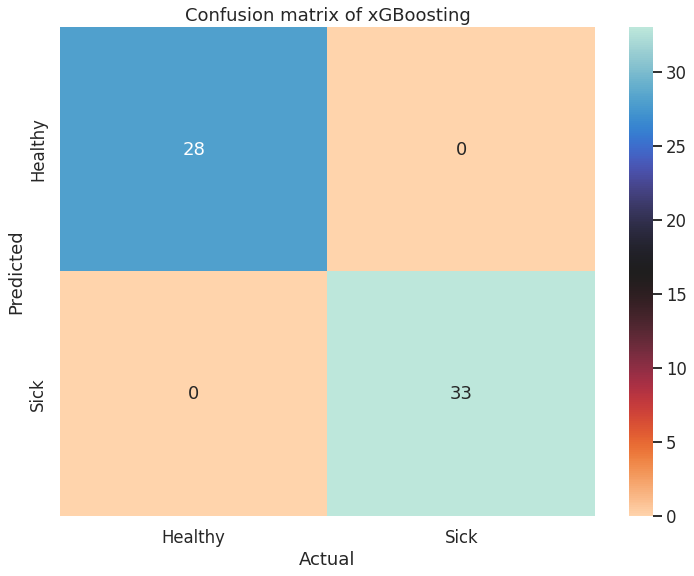

In [478]:
sns.set_context("talk")
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, xticklabels=["Healthy", "Sick"], yticklabels=["Healthy", "Sick"], fmt="g", cmap="icefire_r")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Confusion matrix of xGBoosting")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


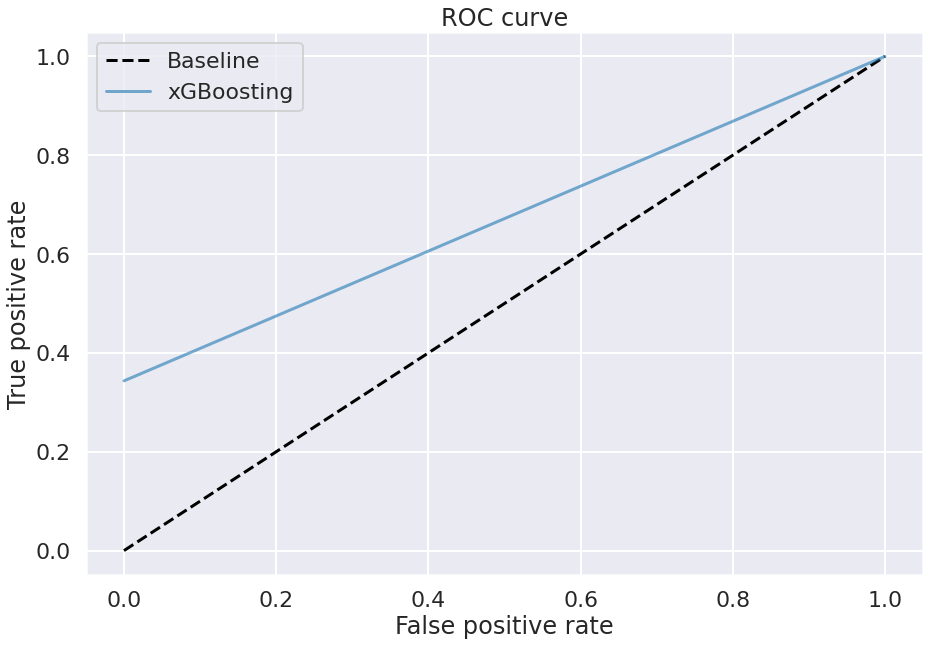

1.0


In [479]:
from sklearn.metrics import roc_auc_score
xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_prob)
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
sns.lineplot(fpr, tpr, alpha=0.6, ci=None)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(["Baseline", "xGBoosting"])
plt.show()
print(roc_auc_score(y_test, xgb_prob))